Midterm Question 1:

A “real-time” price experiment is one where you can change the price charged to the consumer in real-time. In this assignment you will create a robot/algorithm to set prices in real time based on the information learned.  

For this assignment start with the code we had from class 

 Algorithms to try: see https://arxiv.org/abs/1402.6028Links to an external site. for details

 

For each algorithm show:

1. A simulation to show the algorithm works

2. Discuss the tradeoff between learning and earning 

3. If you were hired, which algorithm would you implement?

 

By submitting you acknowledge that you did not use the help of a LLM or a colleague to complete this question

 

 

In all the algorithms, there is an initialization period.  Now for the rounds r (set  r = 1,000) after the initialization period

Algorithm 1: e-Greedy (as in class)

Tuning parameter e
In round r
calculate average profits for each price
with prob e select a random arm
with prob 1-e select the price with the highest average profit

Algorithm 2: Boltzmann Exploration

Tuning parameter tau 
In round r
calculate average profits for each price p, call this mu_p 
for each price p calculate a probability exp(mu_p/tau)/sum(exp(mu_p/tau))

Algorithm 3: UCB 1 [theoretically optimal algorithm]

In round r
calculate average profits for each price and the number of times each price is played so far
for each price calculate an score [called the UCB or upper confidence bound] as follows
UCB for price p = average profits for price p + sqrt(2*log(r)/number of times p is played)
r: is the round number so is the same for all prices
Play the price with the highest UCB score

Notes on this:

For each algorithm we will need to:
1. Create an environment where we define a function to simulate customer demand and generate profits based on the price.
2. Run the simulation for each algorithm over a specified number of rounds.
3. Collect and analyze results to determine which algorithm to implement. 

Below you will find a simple linear demand function where demand increases as price increases. 


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def demand(price):
    max_demand = 100
    return max_demand - price * 10

def profit(price):
    return price * demand(price)

Algorithm 1: e-Greedy (as in class)

Tuning parameter e
In round r
calculate average profits for each price
with prob e select a random arm
with prob 1-e select the price with the highest average profit

In [21]:
def e_greedy(prices, e, rounds):
    n_prices = len(prices)
    profits = np.zeros(n_prices)
    counts = np.zeros(n_prices)
    
    for r in range(1, rounds + 1):
        if np.random.rand() < e:
            price_index = np.random.randint(0, n_prices)
        else:
            price_index = np.argmax(profits / (counts + 1e-5))
        
        price = prices[price_index]
        profit_obtained = profit(price)
        
        counts[price_index] += 1
        profits[price_index] += (profit_obtained - profits[price_index]) / counts[price_index]
    
    return profits, counts

Algorithm 2: Boltzmann Exploration

Tuning parameter tau 
In round r
calculate average profits for each price p, call this mu_p 
for each price p calculate a probability exp(mu_p/tau)/sum(exp(mu_p/tau))

In [22]:
def boltzmann_exploration(prices, tau, rounds):
    n_prices = len(prices)
    profits = np.zeros(n_prices)
    counts = np.zeros(n_prices)
    
    for r in range(1, rounds + 1):
        exp_profits = np.exp(profits / (tau + 1e-5))
        probabilities = exp_profits / np.sum(exp_profits)
        
        price_index = np.random.choice(np.arange(n_prices), p=probabilities)
        price = prices[price_index]
        profit_obtained = profit(price)
        
        counts[price_index] += 1
        profits[price_index] += (profit_obtained - profits[price_index]) / counts[price_index]
    
    return profits, counts


Algorithm 3: UCB 1 [theoretically optimal algorithm]

In round r
calculate average profits for each price and the number of times each price is played so far
for each price calculate an score [called the UCB or upper confidence bound] as follows
UCB for price p = average profits for price p + sqrt(2*log(r)/number of times p is played)
r: is the round number so is the same for all prices
Play the price with the highest UCB score

In [23]:
def ucb1(prices, rounds):
    n_prices = len(prices)
    profits = np.zeros(n_prices)
    counts = np.zeros(n_prices)
    
    for r in range(1, rounds + 1):
        ucb_values = profits / (counts + 1e-5) + np.sqrt(2 * np.log(r) / (counts + 1e-5))
        price_index = np.argmax(ucb_values)
        
        price = prices[price_index]
        profit_obtained = profit(price)
        
        counts[price_index] += 1
        profits[price_index] += (profit_obtained - profits[price_index]) / counts[price_index]
    
    return profits, counts

The next part of code is running the simulation for each algorithm and visualize the results.

Notes on this section: 
Parameter for the simulation are as follows price is from $1-10, there will be 1000 rounds set after the initialization period, e is 0.01, and tau is 1.0.

In [24]:
def run_simulation(prices, rounds, e, tau):
    profits_e_greedy, counts_e_greedy = e_greedy(prices, e, rounds)
    profits_boltzmann, counts_boltzmann = boltzmann_exploration(prices, tau, rounds)
    profits_ucb1, counts_ucb1 = ucb1(prices, rounds)
    
    return (profits_e_greedy, counts_e_greedy), (profits_boltzmann, counts_boltzmann), (profits_ucb1, counts_ucb1)

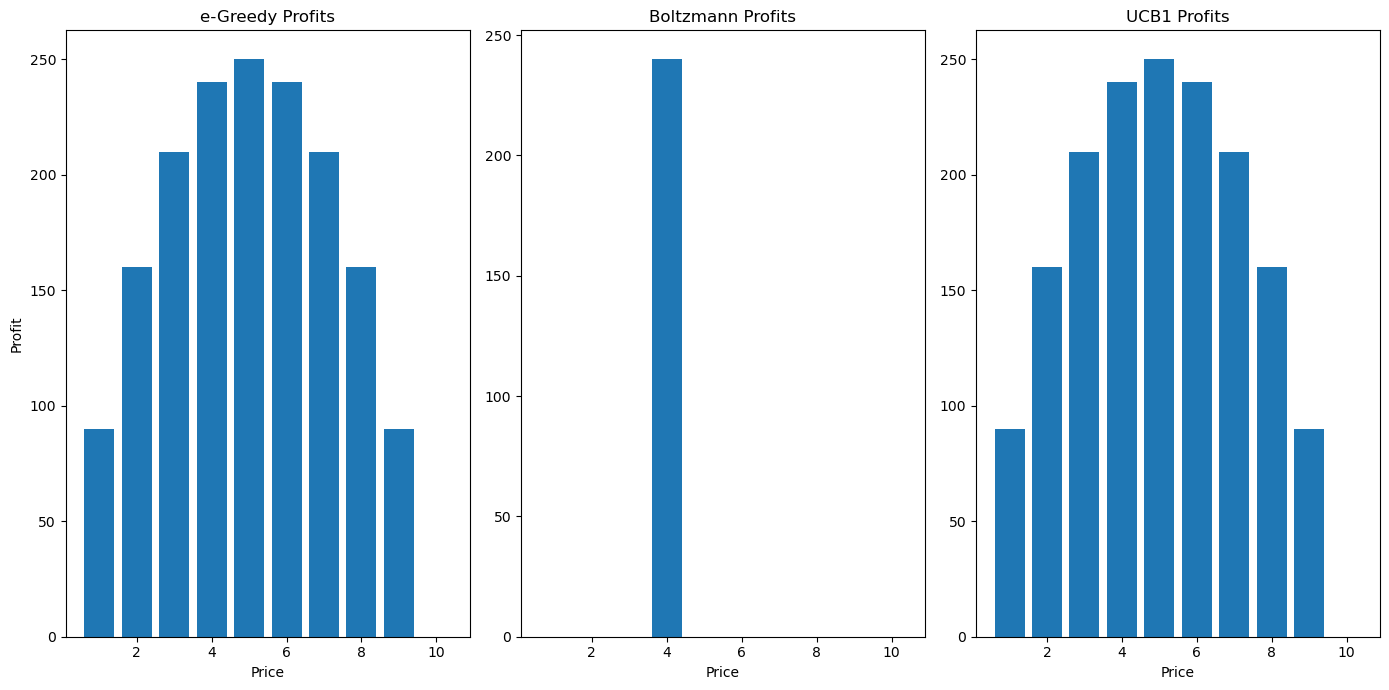

In [25]:
# parameters
prices = np.linspace(1, 10, 10)  
rounds = 1000
e = 0.1
tau = 1.0

# simulation
results = run_simulation(prices, rounds, e, tau)

(profits_e_greedy, counts_e_greedy), (profits_boltzmann, counts_boltzmann), (profits_ucb1, counts_ucb1) = results

# plot 
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.bar(prices, profits_e_greedy)
plt.title("e-Greedy Profits")
plt.xlabel("Price")
plt.ylabel("Profit")

plt.subplot(1, 3, 2)
plt.bar(prices, profits_boltzmann)
plt.title("Boltzmann Profits")
plt.xlabel("Price")

plt.subplot(1, 3, 3)
plt.bar(prices, profits_ucb1)
plt.title("UCB1 Profits")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

In [26]:
# total profits
total_profit_e_greedy = np.sum(profits_e_greedy)
total_profit_boltzmann = np.sum(profits_boltzmann)
total_profit_ucb1 = np.sum(profits_ucb1)

print(f"Profit using e-Greedy: {total_profit_e_greedy}")
print(f"Profit using Boltzmann Exploration: {total_profit_boltzmann}")
print(f"Profit using UCB 1: {total_profit_ucb1}")

Profit using e-Greedy: 1650.0
Profit using Boltzmann Exploration: 240.0
Profit using UCB 1: 1650.0


Analysis of the results: 

e-Greedy:
- pro: 
    - e-Greedy explores by selecting random prices with probability e, ensuring some exploration within the model.
    - model exploitation of best-known price. 
- con: 
    - model exploitation of best-known price.
    - for the model the choice of e is crucial. which means that too high leads to excessive exploration and too low leads to premature convergence.

source: https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/ 

Boltzmann Exploration:
- pro:
    - the exploration of the model by selecting random prices with probability proportional to parameter tau.
    - model uses a probability distribution to explore more promising prices with higher likelihood.
- con:
    - for the model the choice of tau is crucial. which means that too high leads to excessive exploration and too low leads to premature convergence.
    - the model is not deterministic, which means that the model can not be used to predict the best price.
    - significantly lower profit suggests that this algorithm may not be well-tuned for this specific problem or requires more careful parameter selection.

source: https://arxiv.org/pdf/1901.08708 


UCB 1:
- pro:
    - model adjust dynamically using the upper confidence bound allowing for balance in exploration and exploitation of the model. 
    - model provides theoretical optimal balance between learning and earning.
- con: 
    - model tends to explore more early on and exploit more as rounds increase.

sources: https://www.geeksforgeeks.org/upper-confidence-bound-algorithm-in-reinforcement-learning/?ref=ml_lbp 


Recommendations:

As you can see above both the e-Greedy and UCB 1 algorithms achieved the highest total profit of 1650.0, while the Boltzmann Exploration algorithm had a significantly lower total profit of 240.0. So the decision needs to be between the e-Greedy and UCB 1 algorithms based on theoretical guarantees and practical performance. I would recommend implementing the UCB 1 Algorithm due to its theoretical optimal balance between learning and earning. It seems that the UCB 1 algorithm has a strong theoretical backing, ensuring an optimal balance between exploration and exploitation. While it did perform as well as e-Greedy in this simulation in achieving the highest total profit, the dynamic disposition to adjust the exploration based on the confidence bound make it adaptable to different situations. Its ability to balance exploration and exploitation, adapt to changing conditions, and maximize long-term profitability ensures its effectiveness in diverse and dynamic market environments.

other sources: https://www.jeremykun.com/2013/10/28/optimism-in-the-face-of-uncertainty-the-ucb1-algorithm/ and https://people.eecs.berkeley.edu/~jiantao/2902021spring/material.html 
